In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
## Reading the data
df=pd.read_csv('data/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Univariate analysis

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
def plot_hist_by_sns(df,df_col):
    # Seaborn histogram with KDE curve
    sns.histplot(df[df_col], kde=True, color="skyblue", edgecolor="black")
    
    # Adding labels and title
    plt.title(f"Distribution of {df_col}", fontsize=14, fontweight="bold", pad=10)
    plt.xlabel(df_col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
    
    plt.show()

In [8]:
for col in df.columns:
    print(col)

CustomerID
Gender
Age
Annual Income (k$)
Spending Score (1-100)


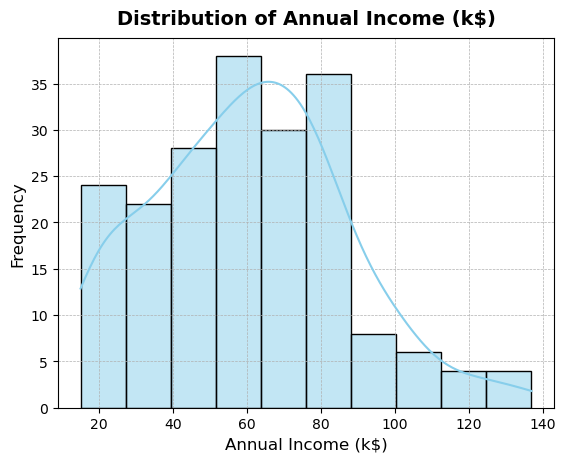

In [9]:
plot_hist_by_sns(df,df.columns[3])

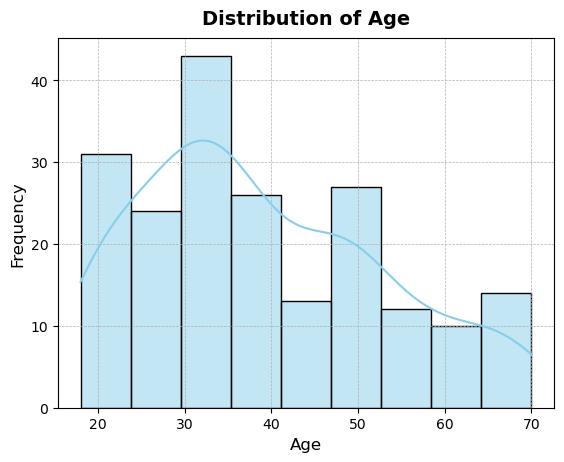

In [10]:
plot_hist_by_sns(df,df.columns[2])

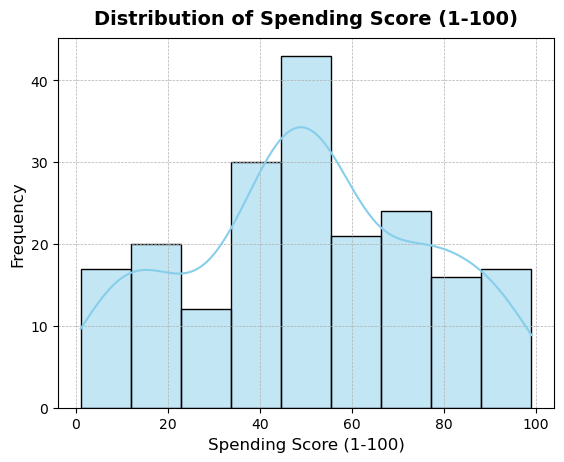

In [11]:
plot_hist_by_sns(df,df.columns[4])

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

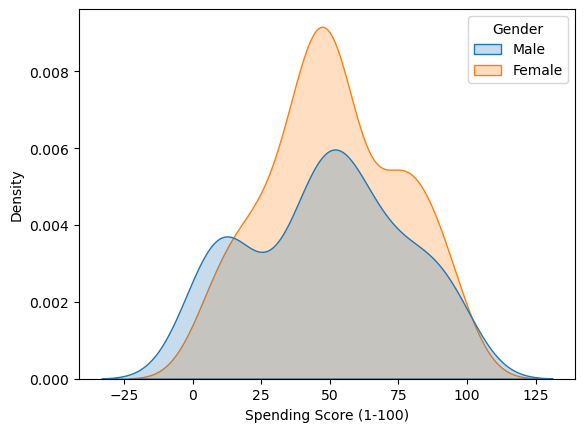

In [12]:
sns.kdeplot(x=df[df.columns[4]],fill=True,hue=df['Gender'])

In [13]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

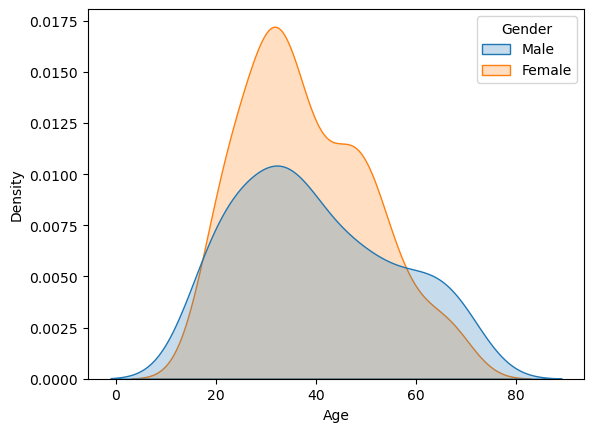

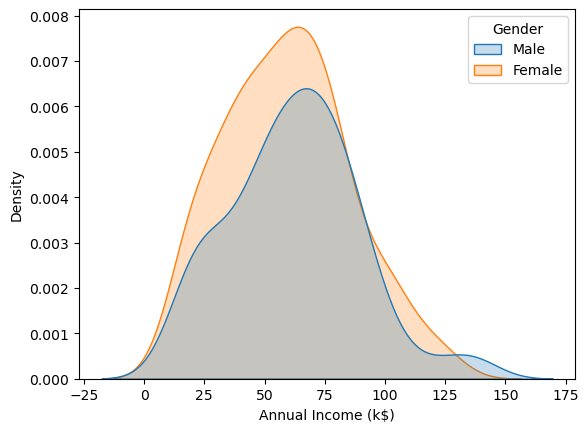

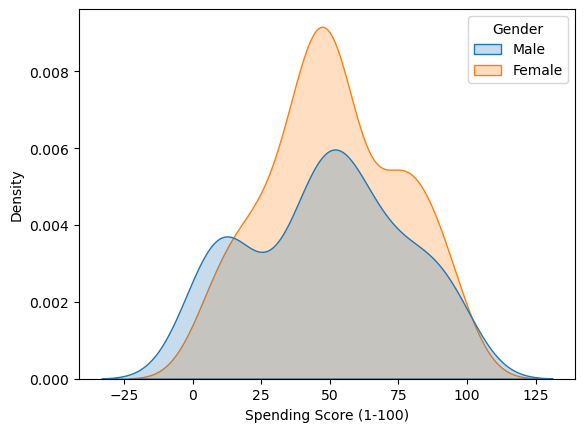

In [14]:
for col in df.columns[2:]:
    sns.kdeplot(x=df[col],fill=True,hue=df['Gender'])
    plt.show()

In [28]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

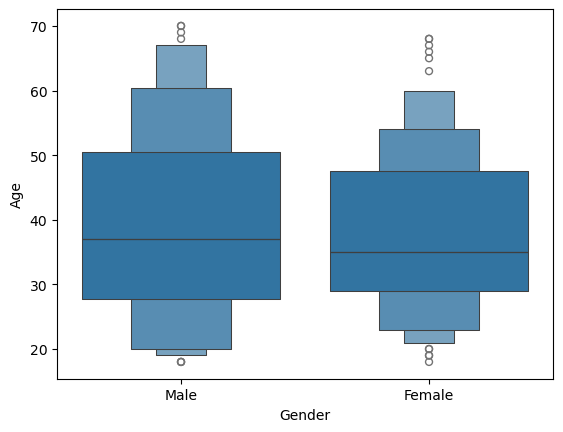

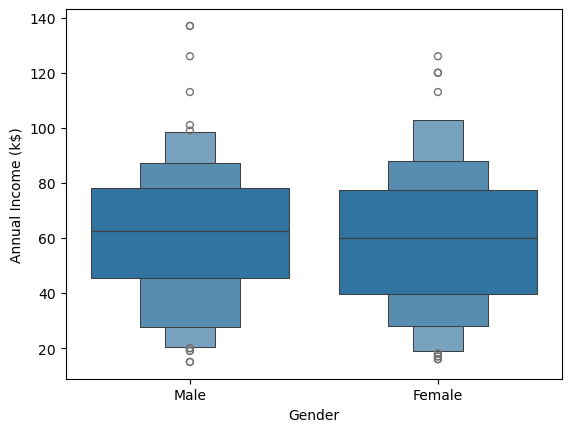

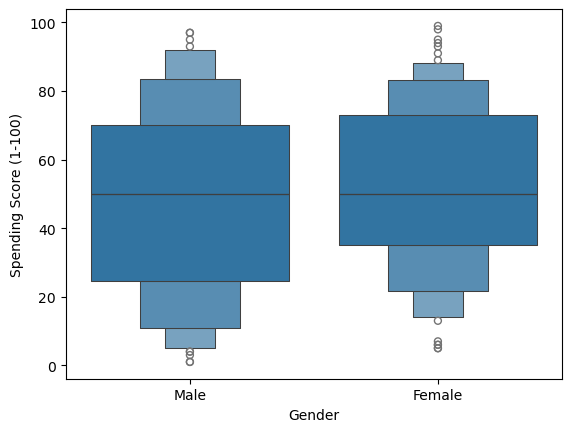

In [30]:
for col in df.columns[2:]:
    plt.figure(figsize=(10, 6))
    sns.boxenplot(data=df, x='Gender', y=col)
    plt.title(f'Boxen Plot of {col} by Gender', fontsize=14, fontweight='bold')
    plt.xlabel('Gender', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.show()

In [31]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## Bivariate analysis

In [35]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

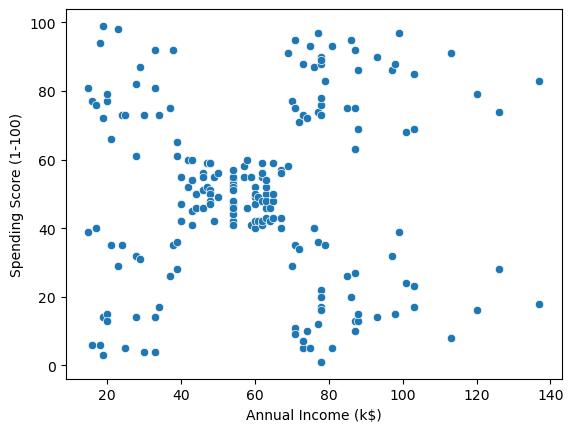

In [37]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

<Axes: xlabel='Annual Income (k$)', ylabel='Age'>

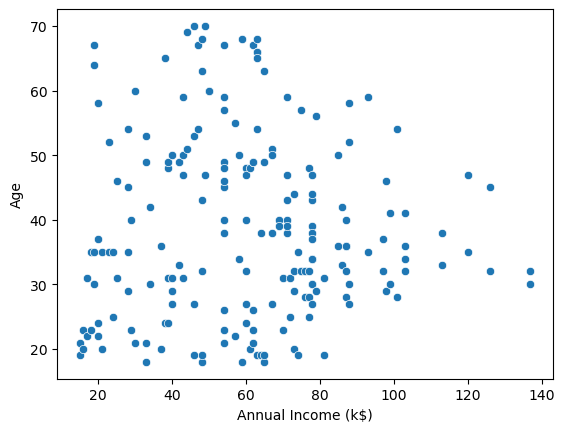

In [38]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Age')

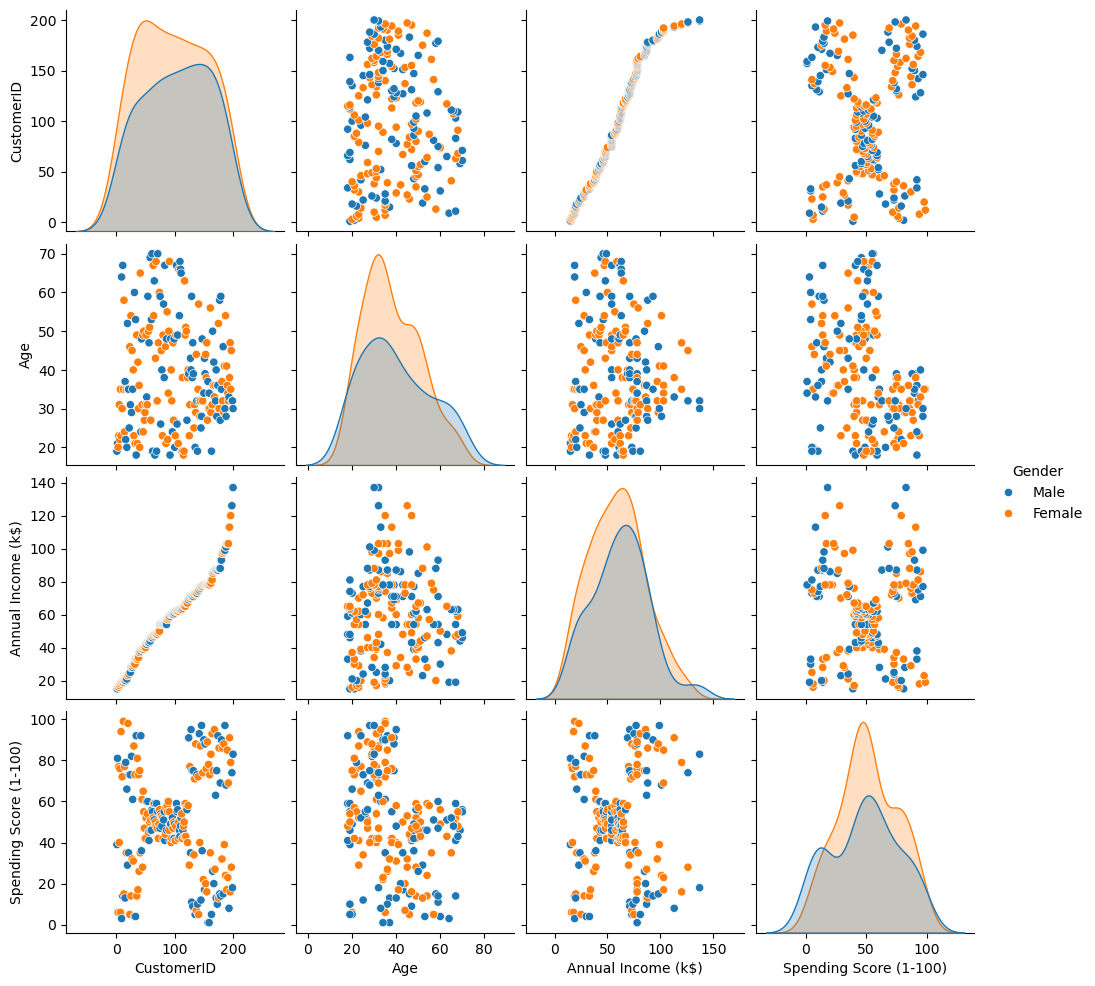

In [40]:
#df=df.drop(df.columns[0],axis=1)
sns.pairplot(data=df,hue='Gender')

In [42]:
df.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


In [43]:
df[['Age','Annual Income (k$)','Spending Score (1-100)']].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

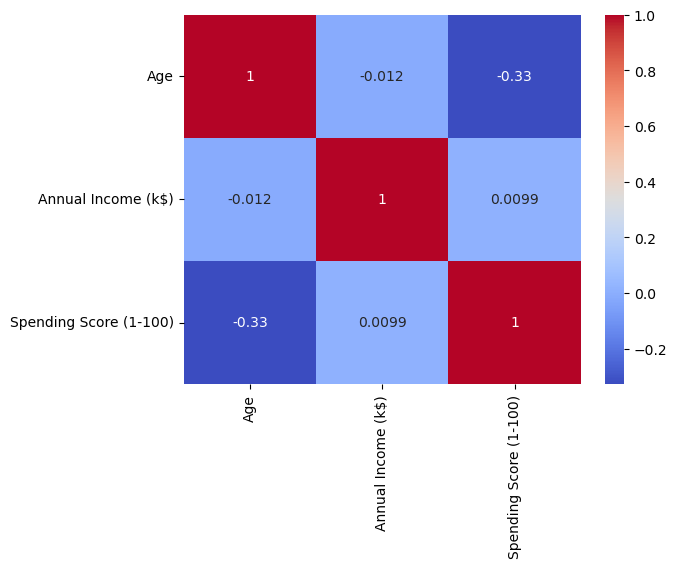

In [44]:
sns.heatmap(data=df[['Age','Annual Income (k$)','Spending Score (1-100)']].corr(),annot=True,cmap='coolwarm')

## Clusting Univariate

In [46]:
clustring_by1=KMeans(n_clusters=5)

In [47]:
clustring_by1.fit(df[['Annual Income (k$)']])

C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [48]:
clustring_by1.n_clusters

5

In [49]:
clustring_by1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4,
       4, 4])

In [50]:
df['income cluster']=clustring_by1.labels_

In [51]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [52]:
df['income cluster'].value_counts()

income cluster
3    74
2    52
0    38
1    28
4     8
Name: count, dtype: int64

In [53]:
clustring_by1.inertia_

8667.679614837507

In [54]:
inertia_score=[]
for i in range(1,12):
    clustring_by1=KMeans(n_clusters=i)
    clustring_by1.fit(df[['Annual Income (k$)']])
    inertia_score.append(clustring_by1.inertia_)

C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

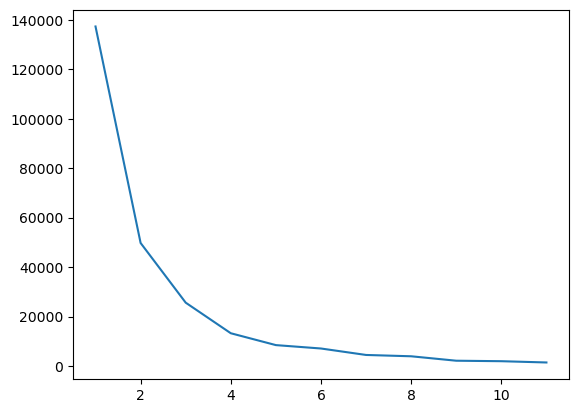

In [55]:
plt.plot(range(1,12),inertia_score)

> So we will use 3 as number of our cluster

In [69]:
clustring_by1=KMeans(n_clusters=3)
clustring_by1.fit(df[['Annual Income (k$)']])

C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [70]:
df['income cluster']=clustring_by1.labels_

In [71]:
df.groupby('income cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income cluster,,,
0,36.910714,92.142857,50.517857
1,37.120690,29.551724,49.689655
2,41.279070,60.906977,50.337209


## Bivariate clusting

In [74]:
clustring_by2=KMeans()
clustring_by2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['income and spending cluster']=clustring_by2.labels_
df.head()

C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,income and spending cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,7
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,3


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

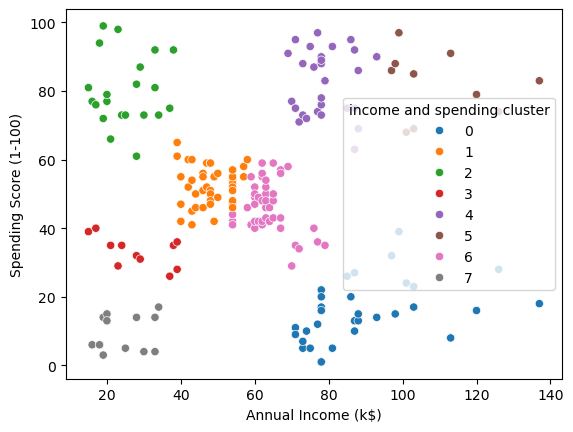

In [79]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='income and spending cluster',palette='tab10')

In [81]:
inertia_score2=[]
for i in range(1,12):
    clustring_by2=KMeans(n_clusters=i)
    clustring_by2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_score2.append(clustring_by2.inertia_)

C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

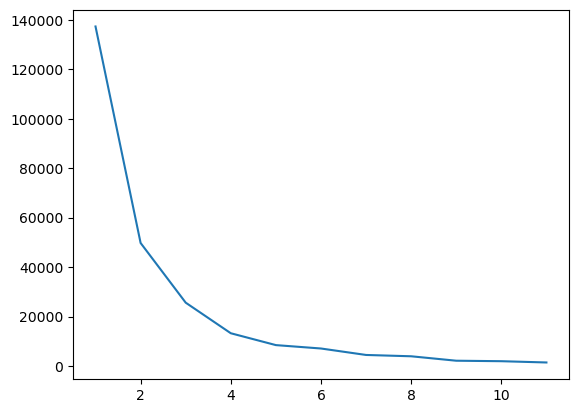

In [83]:
plt.plot(range(1,12),inertia_score)

In [84]:
clustring_by2=KMeans(n_clusters=5)
clustring_by2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['income and spending cluster']=clustring_by2.labels_

C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [94]:
df.groupby('income and spending cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income and spending cluster,,,
0,32.692308,86.538462,82.128205
1,45.217391,26.304348,20.913043
2,40.666667,87.750000,17.583333
3,42.937500,55.087500,49.712500
4,25.272727,25.727273,79.363636


In [98]:
centers=pd.DataFrame(clustring_by2.cluster_centers_,columns=['X','Y'])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

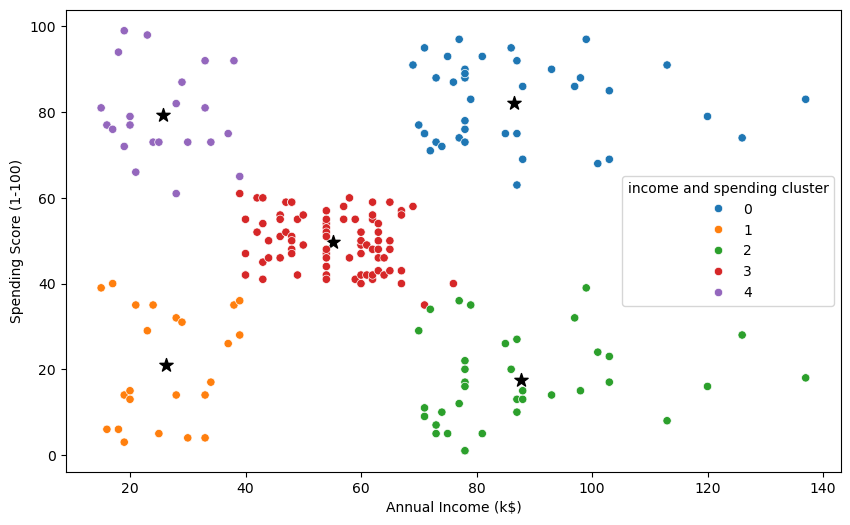

In [106]:
plt.figure(figsize=(10,6))
plt.scatter(x=centers['X'],y=centers['Y'],marker='*',c='black',s=100)
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='income and spending cluster',palette='tab10')

In [100]:
centers

,X,Y
0,86.538462,82.128205
1,26.304348,20.913043
2,87.750000,17.583333
3,55.087500,49.712500
4,25.727273,79.363636


In [118]:
pd.crosstab(df['income and spending cluster'],df['Gender'],normalize="index")*100

Gender,Female,Male
income and spending cluster,,
0,53.846154,46.153846
1,60.869565,39.130435
2,47.222222,52.777778
3,58.750000,41.250000
4,59.090909,40.909091


## Mutlivariant Analysic

In [141]:
from sklearn.preprocessing import StandardScaler

In [143]:
scale=StandardScaler()

In [153]:
df_coded=pd.get_dummies(df,drop_first=True)

In [158]:
df_coded=df_coded[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Male']]

In [170]:
df_coded=pd.DataFrame(scale.fit_transform(df_coded))

C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

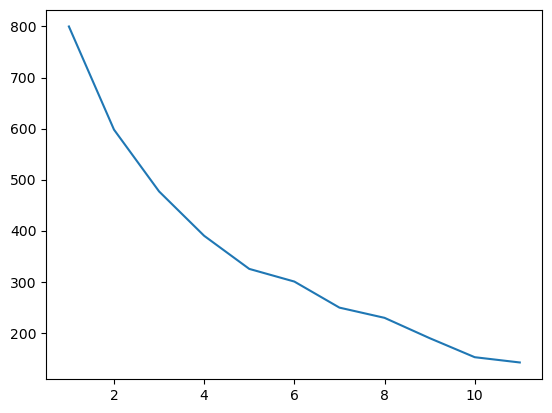

In [172]:
inertia_score_All=[]
for i in range(1,12):
    clustring_by_All=KMeans(n_clusters=i)
    clustring_by_All.fit(df_coded)
    inertia_score_All.append(clustring_by_All.inertia_)
plt.plot(range(1,12),inertia_score_All)

In [174]:
clustring_by_All=KMeans(n_clusters=6)
clustring_by_All.fit(df_coded)

C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6)

In [178]:
centers=pd.DataFrame(clustring_by_All.cluster_centers_,columns=['X','Y'])
plt.figure(figsize=(10,6))
plt.scatter(x=centers['X'],y=centers['Y'],marker='*',c='black',s=100)
sns.scatterplot(data=df_coded,palette='tab10')

ValueError: Shape of passed values is (6, 4), indices imply (6, 2)